In [1]:
#pip install picai-prep
from picai_prep.examples.mha2nnunet.picai_archive import generate_mha2nnunet_settings
from picai_prep import MHA2nnUNetConverter
import SimpleITK as sitk
import json,random

If you have questions or suggestions, feel free to open an issue at https://github.com/DIAGNijmegen/picai_prep



In [2]:
model_path='/data1/practical-sose23/morphometric/models/'
lables_path='/data1/practical-sose23/morphometric/picai_labels'
data_path='/data1/practical-sose23/morphometric/data'
data_path_Conv_nnUNet='/data1/practical-sose23/morphometric/nnUNet_raw_data/'
json_path_mha2nnunet_settings='/u/home/ahy/adlm_ss2023_mmcl/mha2nnunet_settings.json'

## Preproccessing 

In [142]:
def preprocess_picai_annotation(lbl: sitk.Image) -> sitk.Image:
    """Binarize the granular ISUP ≥ 2 annotations"""
    lbl_arr = sitk.GetArrayFromImage(lbl)

    # convert granular PI-CAI csPCa annotation to binary csPCa annotation
    lbl_arr = (lbl_arr >= 1).astype('uint8')

    # convert label back to SimpleITK
    lbl_new: sitk.Image = sitk.GetImageFromArray(lbl_arr)
    lbl_new.CopyInformation(lbl)
    return lbl_new

In [152]:
#1. generated configuration file for the MHA dir 
generate_mha2nnunet_settings(
    archive_dir=data_path,
    annotations_dir=lables_path+"/csPCa_lesion_delineations/human_expert/resampled",
    output_path=json_path_mha2nnunet_settings
)

100%|██████████| 1476/1476 [00:00<00:00, 30753.91it/s]

"
    Saved mha2nnunet_settings to /u/home/ahy/adlm_ss2023_mmcl/mha2nnunet_settings.json, with 1295 cases.
    


In [153]:
#  2. Add to the preproccsing 
with open(json_path_mha2nnunet_settings, 'r') as f:
    json_mha2nnunet_settings = json.load(f)

json_mha2nnunet_settings['preprocessing']= {
    "matrix_size": [20, 160, 160],
    "spacing": [3.0, 0.5, 0.5]
}

with open(json_path_mha2nnunet_settings, 'w', encoding='utf-8') as f:
    json.dump(json_mha2nnunet_settings, f, ensure_ascii=False, indent=4)

if not "options" in json_mha2nnunet_settings:
    json_mha2nnunet_settings["options"] = {}
    json_mha2nnunet_settings["options"]["annotation_preprocess_func"] = preprocess_picai_annotation


In [154]:
#3. Convert MHA => nnUNet using the generated configuration file
archive = MHA2nnUNetConverter(
    scans_dir=data_path,
    annotations_dir=lables_path,  # defaults to input_path
    output_dir=data_path_Conv_nnUNet,
    mha2nnunet_settings=json_path_mha2nnunet_settings,
)
archive.convert()
archive.create_dataset_json()

Writing log to /data1/practical-sose23/morphometric/nnUNet_raw_data/picai_prep_20230503172011.log


100%|██████████| 1295/1295 [01:12<00:00, 17.79it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/data1/practical-sose23/morphometric/nnUNet_raw_data/Task2201_picai_baseline/dataset.json'

FileNotFoundError: [Errno 2] No such file or directory: '/data1/practical-sose23/morphometric/nnUNet_raw_data/Task2201_picai_baseline/dataset.json'

In [67]:
!cat /data1/practical-sose23/morphometric/nnUNet_raw_data/picai_prep_20230503135424.log

Output directory set to /data1/practical-sose23/morphometric/nnUNet_raw_data
MHA2nnUNet conversion started at 2023-05-03T13:54:24.324449

Skipped conversion of 0
MHA2nnUNet conversion ended at 2023-05-03T13:55:30.062635
	(runtime 0:01:05.738186)
Output directory set to /data1/practical-sose23/morphometric/nnUNet_raw_data
MHA2nnUNet conversion started at 2023-05-03T14:02:55.091239

Skipped conversion of 0
MHA2nnUNet conversion ended at 2023-05-03T14:04:07.925452
	(runtime 0:01:12.834213)
Output directory set to /data1/practical-sose23/morphometric/nnUNet_raw_data
MHA2nnUNet conversion started at 2023-05-03T14:16:51.890961

Output directory set to /data1/practical-sose23/morphometric/nnUNet_raw_data
MHA2nnUNet conversion started at 2023-05-03T14:23:05.315195

Skipped conversion of 0
MHA2nnUNet conversion ended at 2023-05-03T14:24:15.709668
	(runtime 0:01:10.394473)


In [ ]:
# from picai_prep import nnunet2nndet

# nnunet2nndet(
#     nnunet_raw_data_path="/input/path/to/nnUNet_raw_data/Task100_test",
#     nndet_raw_data_path="/output/path/to/nnDet_raw_data/Task100_test",
# )

## Visualization

In [1]:
from medpy import io
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'medpy'

(384, 384, 19)
(384, 384, 19)
(384, 384, 19)


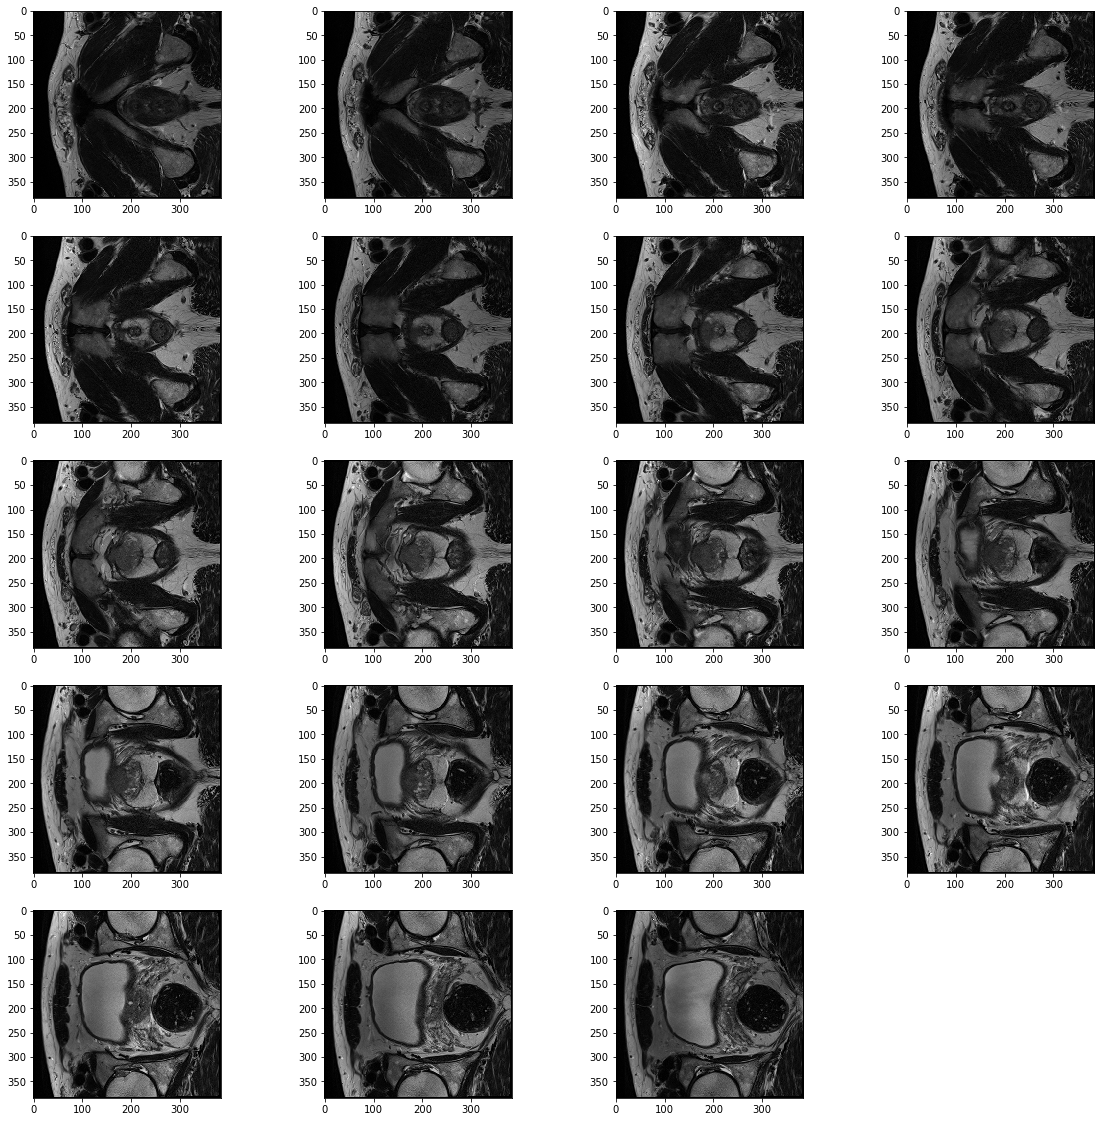

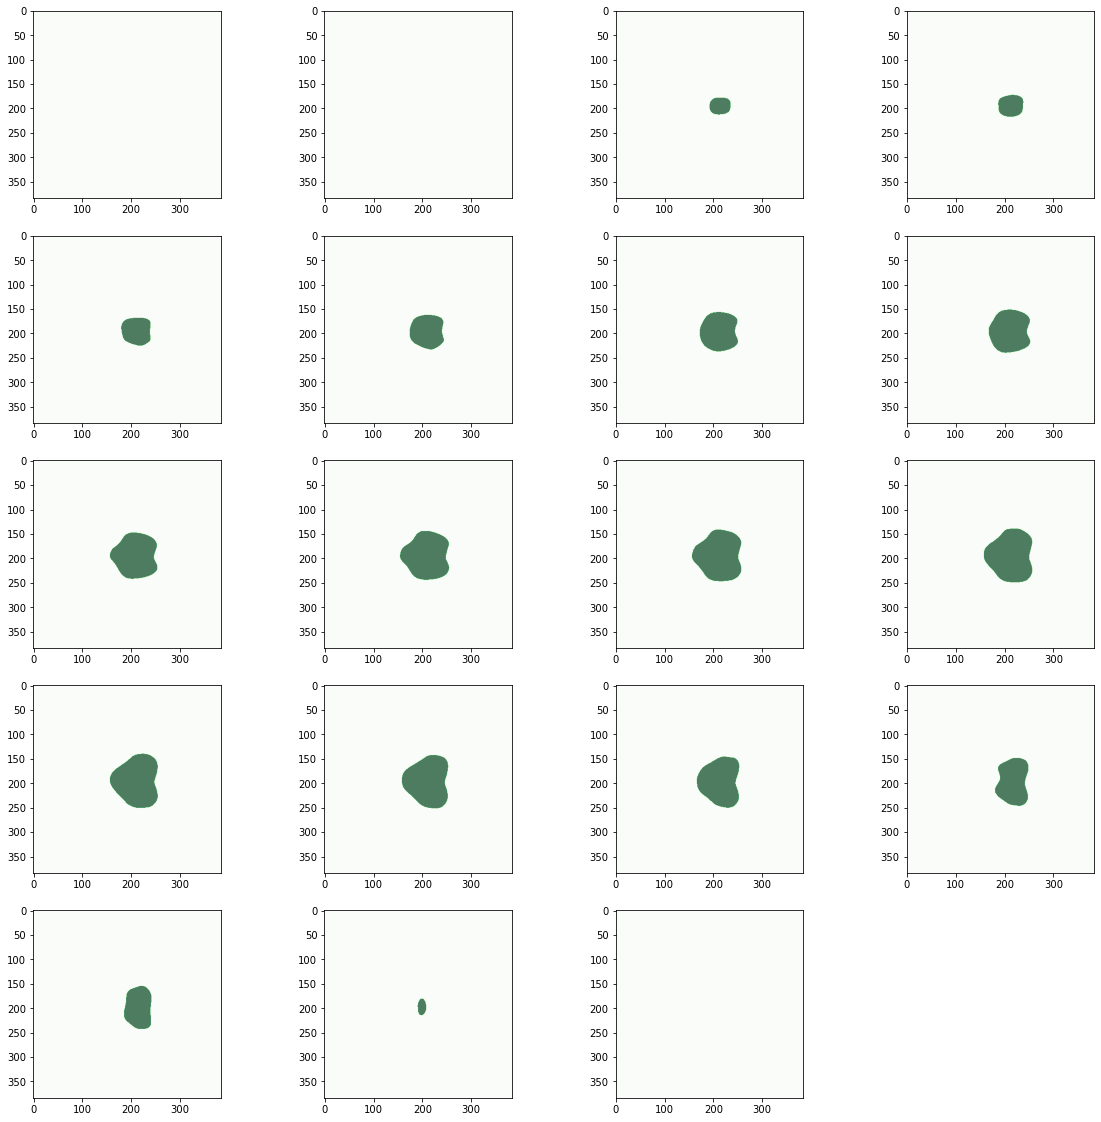

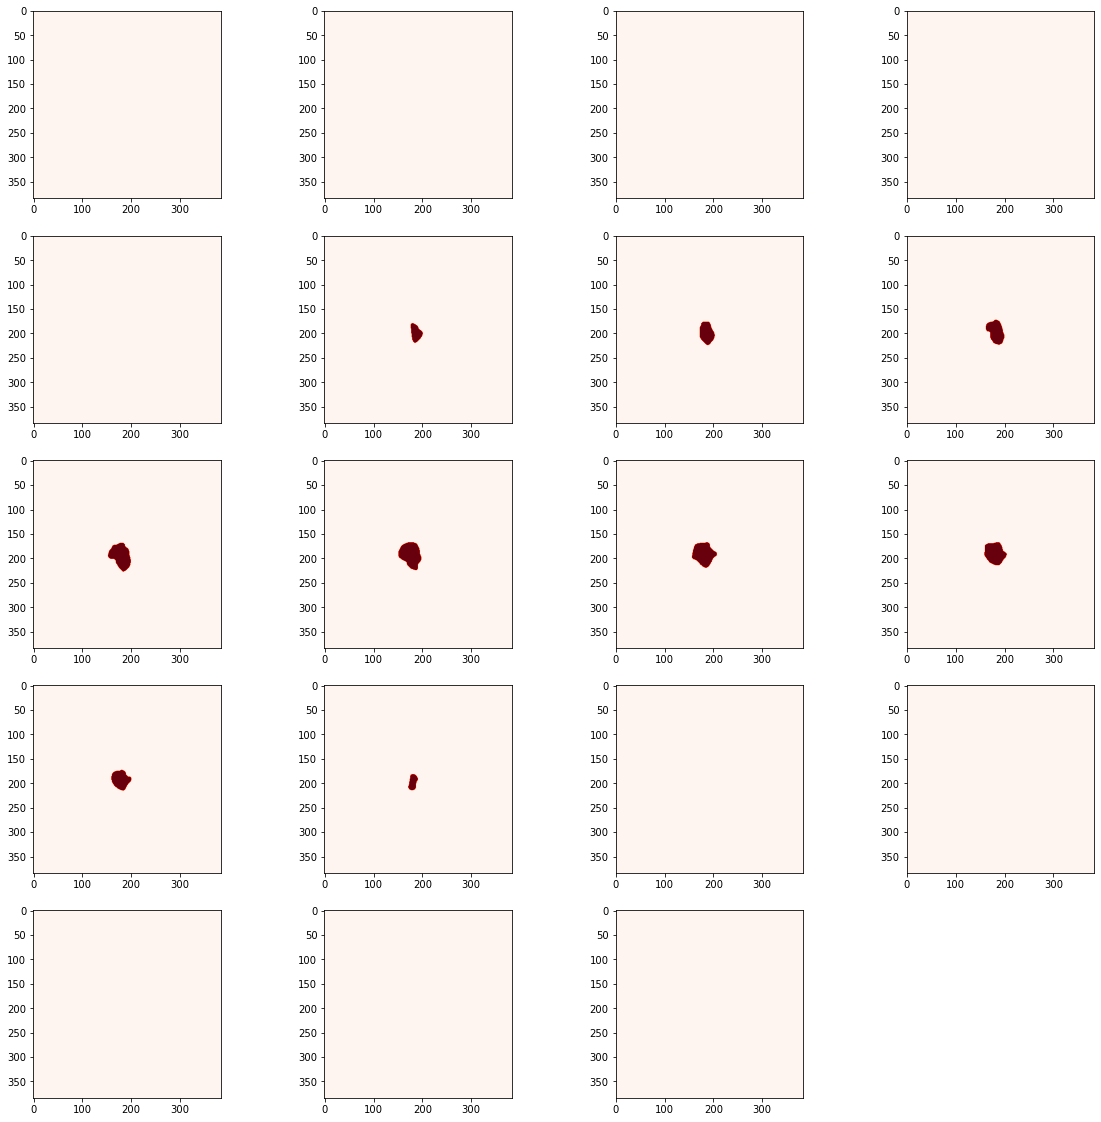

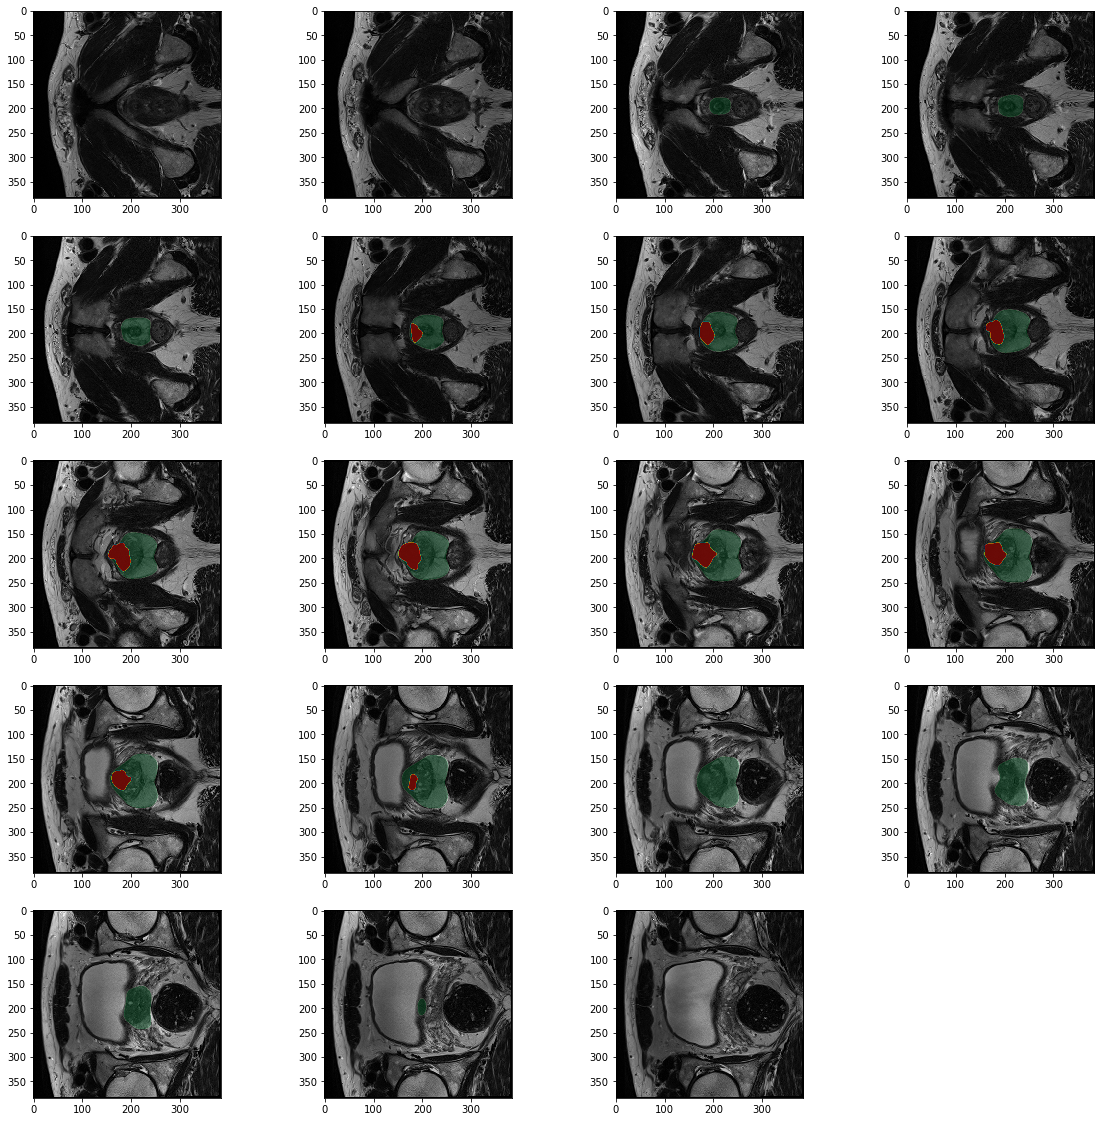

In [33]:
data = io.load("/data1/practical-sose23/morphometric/data/10021/10021_1000021_t2w.mha")[0]
gland = io.load("/data1/practical-sose23/morphometric/picai_labels/anatomical_delineations/whole_gland/AI/Bosma22b/10021_1000021.nii.gz")[0]
lesion = io.load("/data1/practical-sose23/morphometric/picai_labels/csPCa_lesion_delineations/human_expert/resampled/10021_1000021.nii.gz")[0]

#data = io.load("/data1/practical-sose23/morphometric/data/10433/10433_1000441_t2w.mha")[0]
#gland = io.load("/data1/practical-sose23/morphometric/picai_labels/anatomical_delineations/whole_gland/AI/Bosma22b/10433_1000441.nii.gz")[0]
#lesion = io.load("/data1/practical-sose23/morphometric/picai_labels/csPCa_lesion_delineations/human_expert/resampled/")[0]

print(data.shape)
print(gland.shape)
print(lesion.shape)

fig = plt.figure(figsize=(20,20))
rows = 5
columns = 4
for i in range(19):
    #im = data[:,:,i]
    #mask = 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data[:,:,i], cmap="gray", interpolation="none")

fig = plt.figure(figsize=(20,20))
rows = 5
columns = 4
for i in range(19):
    #im = data[:,:,i]
    #mask = 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(gland[:,:,i], cmap="Greens", alpha = 0.7)


fig = plt.figure(figsize=(20,20))
rows = 5
columns = 4
for i in range(19):
    #im = data[:,:,i]
    #mask = 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(lesion[:,:,i], cmap="Reds", alpha = 1)

fig = plt.figure(figsize=(20,20))
rows = 5
columns = 4
for i in range(19):
    #im = data[:,:,i]
    #mask = 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data[:,:,i], cmap="gray", interpolation="none")
    plt.imshow(gland[:,:,i], cmap="Greens", alpha = 0.5*(gland[:,:,i]>0))
    plt.imshow(lesion[:,:,i], cmap="jet", alpha = 0.8*(lesion[:,:,i]>0))

(384, 384, 19)
(384, 384, 19)
(384, 384, 19)


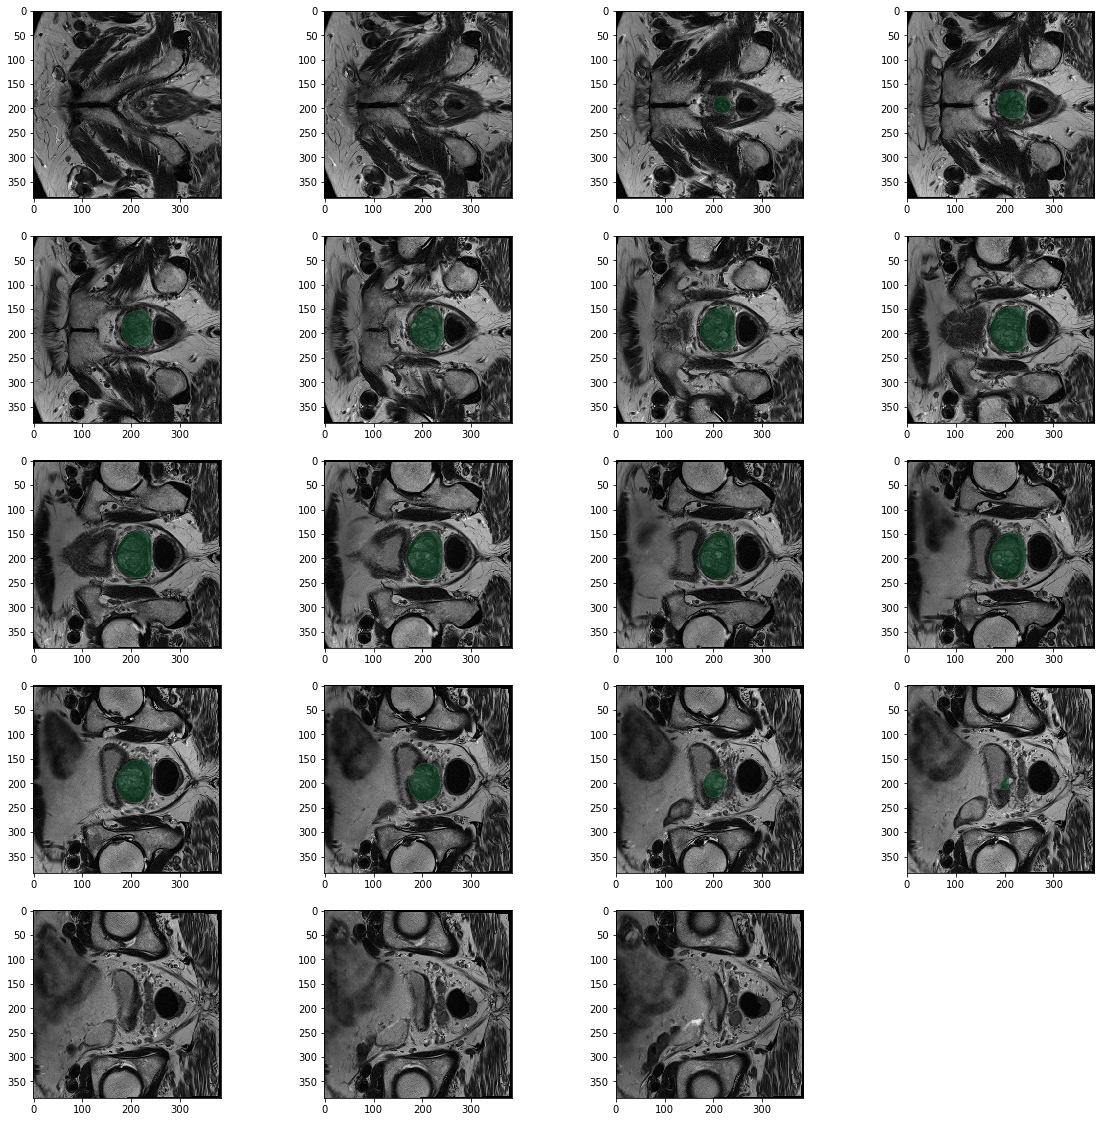

In [23]:
data = io.load("/data1/practical-sose23/morphometric/data/10152/10152_1000154_t2w.mha")[0]
gland = io.load("/data1/practical-sose23/morphometric/picai_labels/anatomical_delineations/whole_gland/AI/Bosma22b/10152_1000154.nii.gz")[0]
lesion = io.load("/data1/practical-sose23/morphometric/picai_labels/csPCa_lesion_delineations/human_expert/resampled/10152_1000154.nii.gz")[0]

print(data.shape)
print(gland.shape)
print(lesion.shape)

#fig = plt.figure(figsize=(20,20))
#rows = 5
#columns = 4
#for i in range(19):
#    #im = data[:,:,i]
#    #mask = 
#    fig.add_subplot(rows, columns, i+1)
#    plt.imshow(data[:,:,i], cmap="gray", interpolation="none")
#
#fig = plt.figure(figsize=(20,20))
#rows = 5
#columns = 4
#for i in range(19):
#    #im = data[:,:,i]
#    #mask = 
#    fig.add_subplot(rows, columns, i+1)
#    plt.imshow(gland[:,:,i], cmap="jet", alpha = 0.7)
#
#
#fig = plt.figure(figsize=(20,20))
#rows = 5
#columns = 4
#for i in range(19):
#    #im = data[:,:,i]
#    #mask = 
#    fig.add_subplot(rows, columns, i+1)
#    plt.imshow(lesion[:,:,i], cmap="jet", alpha = 1)

fig = plt.figure(figsize=(20,20))
rows = 5
columns = 4
for i in range(19):
    #im = data[:,:,i]
    #mask = 
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data[:,:,i], cmap="gray", interpolation="none")
    plt.imshow(gland[:,:,i], cmap="Greens", alpha = 0.5*(gland[:,:,i]>0))
    plt.imshow(lesion[:,:,i], cmap="jet", alpha = 0.8*(lesion[:,:,i]>0))

(640, 640, 19)


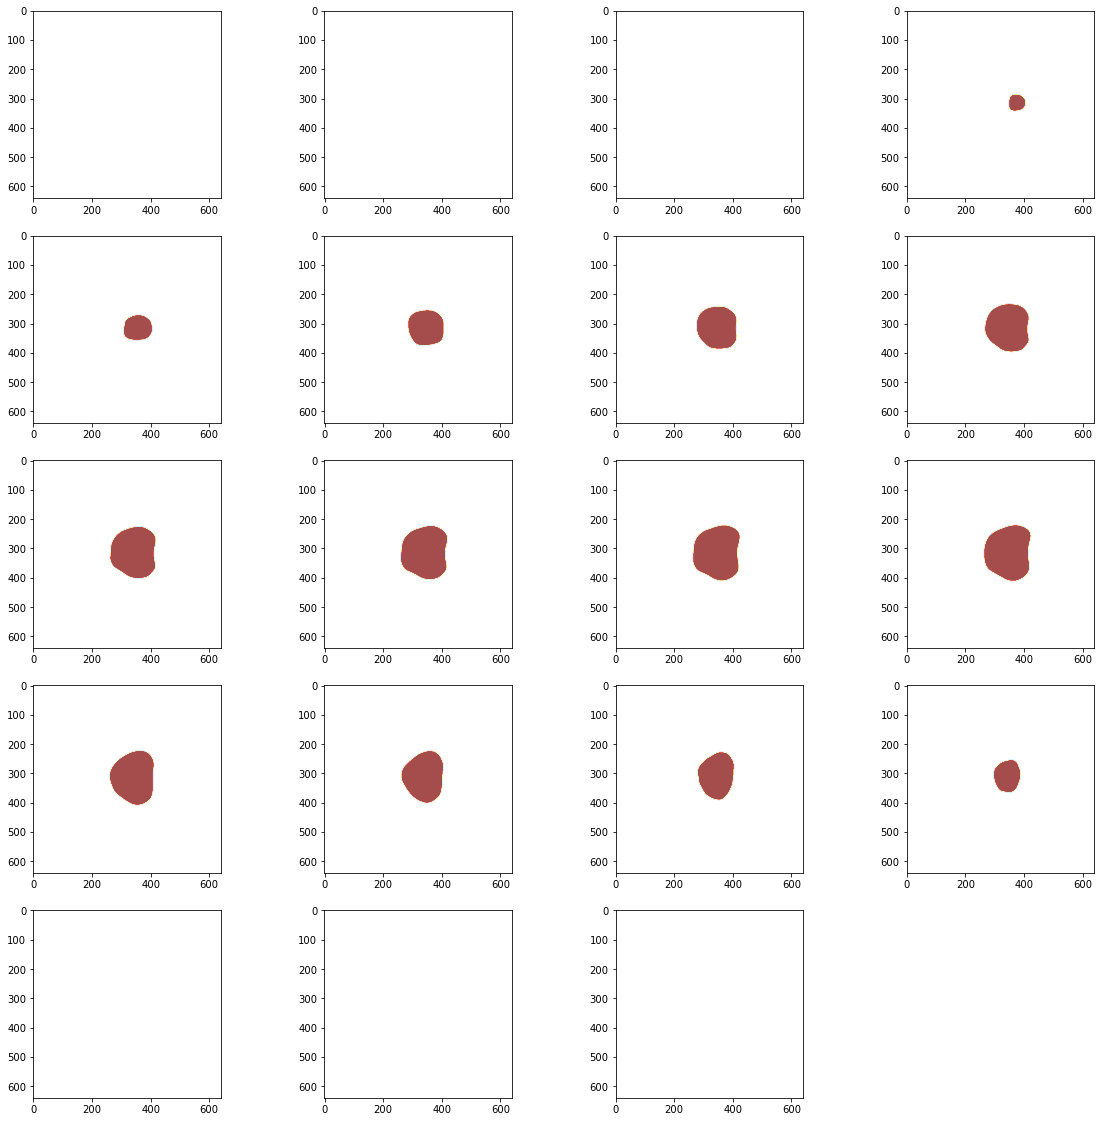

In [38]:

data = io.load("/data1/practical-sose23/morphometric/picai_labels/anatomical_delineations/whole_gland/AI/Bosma22b/10129_1000129.nii.gz")[0]
print(data.shape)
fig = plt.figure(figsize=(20,20))
rows = 5
columns = 4
for i in range(19):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data[:,:,i], cmap="jet", alpha = 0.7*(data[:,:,i]>0))
    data[:,:,7].max()
    

In [125]:
numOfStudies = len(json_mha2nnunet_settings['archive'])
print('# of patients in data folder =\t{}'.format((len(os.listdir(data_path)))))
print('# of Studies=\t{}'.format(numOfStudies))

patiend_id = 10129 # patiend_id with 2  studies
patient_dir = os.path.join(data_path, str(patiend_id))
files = os.listdir(patient_dir)
files = [fn.replace(".mha", "") for fn in files if ".mha" in fn and "._" not in fn]
subject_ids = ["_".join(fn.split("_")[0:2]) for fn in files]
subject_ids = sorted(list(set(subject_ids)))
subject_ids = [subject_id.split('_')[1] for subject_id in subject_ids]
subject_modalities = list(set([f[-3:]for f in files]))
print('patient id = {}\nhas Studies ids={}\nwith modalities={}'.format(
    patiend_id,subject_ids,subject_modalities))

# of patients in data folder =	1476
# of Studies=	1295
patient id = 10129
has Studies ids=['1000129', '1000130']
with modalities=['t2w', 'cor', 'hbv', 'sag', 'adc']


In [157]:
[patient_dir+"/"+fn+'.mha' for fn in files]

['/data1/practical-sose23/morphometric/data/10129/10129_1000130_cor.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000129_cor.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000130_hbv.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000129_adc.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000130_adc.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000130_sag.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000129_hbv.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000130_t2w.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000129_t2w.mha',
 '/data1/practical-sose23/morphometric/data/10129/10129_1000129_sag.mha']

In [176]:
image = sitk.ReadImage("/data1/practical-sose23/morphometric/data/10129/10129_1000129_adc.mha")
sitk.Show(image)


RuntimeError: Exception thrown in SimpleITK Show: /tmp/SimpleITK/Code/IO/src/sitkImageViewer.cxx:620:
sitk::ERROR: No ImageJ/Fiji application found.

TypeError: Invalid shape (19, 128, 120) for image data

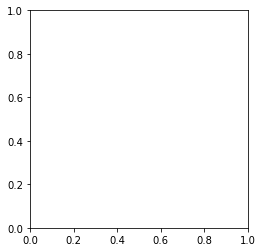

In [175]:

from matplotlib import pyplot as plt
from PIL import Image
nda = sitk.GetArrayFromImage(image)

plt.imshow(nda)

